In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import pivot_table
import json
from statistics import median

In [ ]:
### Explore Medium size world map Json file

In [2]:
with open("world_layers_med.json") as geofile:
    geojson_layer = json.load(geofile)

In [3]:
geo_list = []

for i in geojson_layer['features']:
    geo_list.append(i.get('properties').get('name'))
    
print(len(geo_list))
print(geo_list[:5])

232
['Aruba', 'Anguilla', 'Antigua and Barb.', 'Bahamas', 'St-BarthÃ©lemy']


## Remove countries not in dataset

In [34]:
he = pd.read_csv('he_map_lean_country.csv', header=0, index_col=0)

print(he.shape)
he.head()

(8999, 8)


,School,Country,Num,Rank,Student Total,Perc,PercText,PercRank
0,The University of Aberdeen,Austria,45,8.0,12425,0.0036,0.36%,28.0
1,The University of Aberdeen,Belgium,55,12.0,12425,0.0044,0.44%,33.0
2,The University of Aberdeen,Bulgaria,180,28.0,12425,0.0145,1.45%,62.0
3,The University of Aberdeen,Croatia,10,3.0,12425,0.0008,0.08%,7.0
4,The University of Aberdeen,Czech Rep.,100,15.0,12425,0.0080,0.8%,35.0


In [40]:
he_list = he.Country.unique()

print(len(he_list))
he_list[:10]

154


array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czech Rep.',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany'], dtype=object)

## Calibrating zoom

In [36]:
def flatten(items, seqtypes=(list, tuple)):
    new_items = items.copy()
    int_items = []
    for i, x in enumerate(new_items):
        while i < len(new_items) and isinstance(new_items[i], seqtypes):
            new_items[i:i+1] = new_items[i]
    for i in new_items:
        if isinstance(i, int):
            int_items.append(i)
    return new_items

In [37]:
# for i in geojson_layer['features']:
#     print("{} - {}".format(i.get('properties').get('name'), len(flatten(i.get('geometry').get('coordinates')))))

In [44]:
cols = ['Country', 'Coords']
df = pd.DataFrame(columns=cols, index=range(len(he_list)))

starter = 0

for i in geojson_layer['features']:
    if i.get('properties').get('name') in he_list:
        df.loc[starter].Country = i.get('properties').get('name')
        df.loc[starter].Coords = len(flatten(i.get('geometry').get('coordinates')))
        starter += 1
    
df.dropna(inplace=True)
df.sort_values(by=['Coords'], inplace=True)

print(df.shape)
df.head()

(148, 2)


,Country,Coords
130,Monaco,14
2,Barbados,18
97,Singapore,18
68,Bahrain,26
133,Malta,32


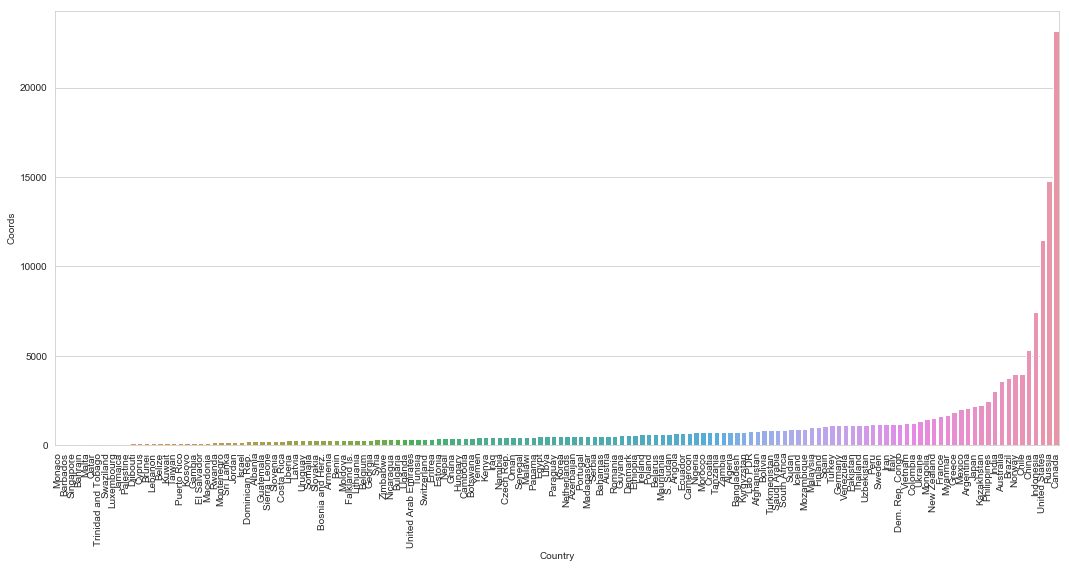

In [45]:
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")

cc = sns.barplot(x='Country', y='Coords', data=df)
cc.set_xticklabels(cc.get_xticklabels(), rotation=90)

cc

In [46]:
lg_df = df[df.Coords > 2000]

print(len(lg_df))
lg_df

15


,Country,Coords
8,Mexico,2030
14,Argentina,2078
78,Japan,2194
79,Kazakhstan,2280
93,Philippines,2476
71,India,3042
146,Australia,3598
17,Brazil,3770
137,Norway,3970
18,Chile,4012


In [48]:
# df[(df.Coords > 1000) & (df.Coords < 2000)]

In [49]:
# df[(df.Coords > 250) & (df.Coords < 1000)]

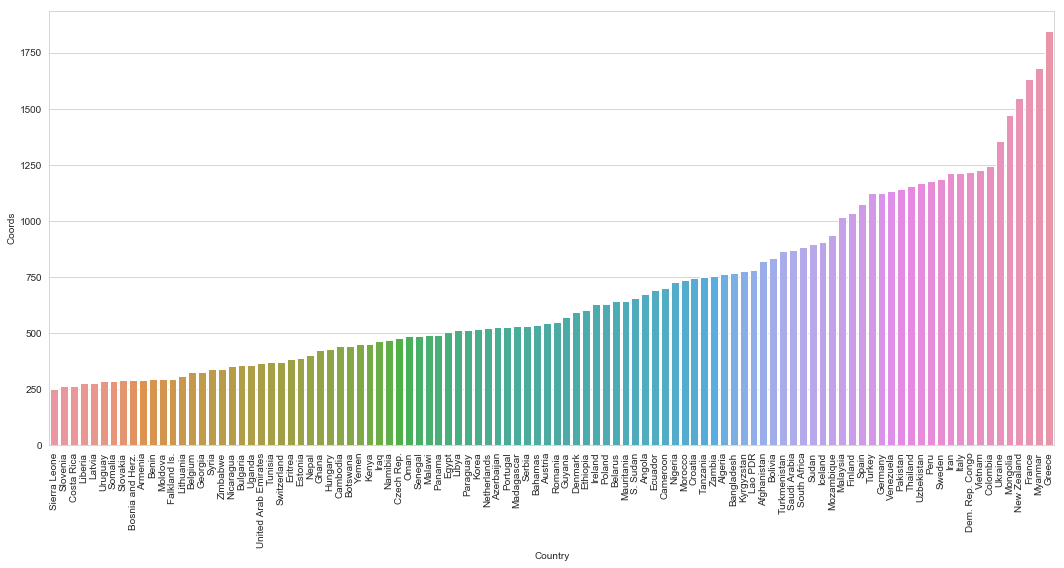

In [51]:
md_df = df[(df.Coords < 2000) & (df.Coords > 250)]

plt.figure(figsize=(18,8))
sns.set_style("whitegrid")

cc = sns.barplot(x='Country', y='Coords', data=md_df)
cc.set_xticklabels(cc.get_xticklabels(), rotation=90)

cc

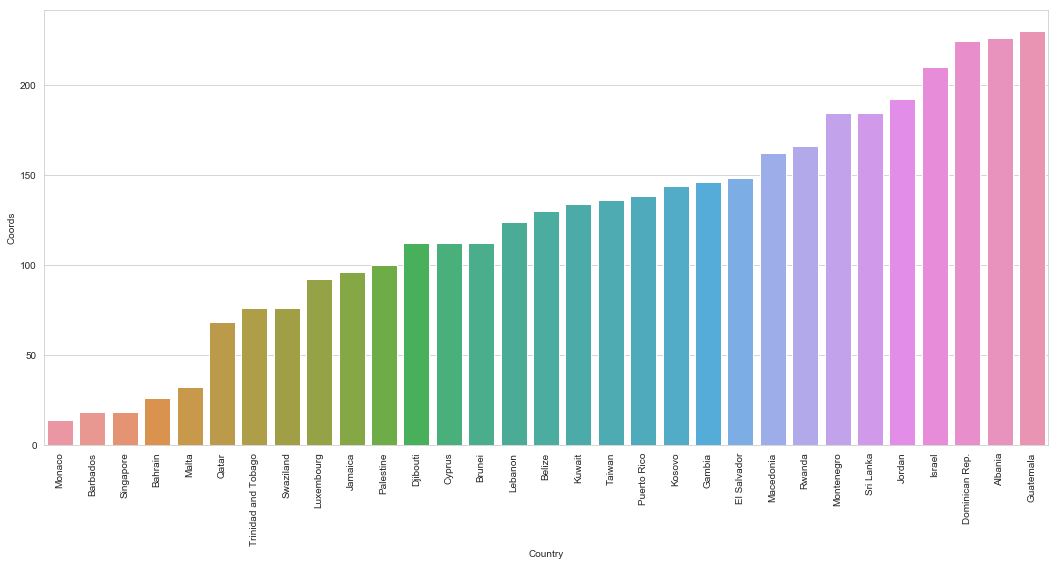

In [52]:
sm_df = df[df.Coords < 250]

plt.figure(figsize=(18,8))
sns.set_style("whitegrid")

cc = sns.barplot(x='Country', y='Coords', data=sm_df)
cc.set_xticklabels(cc.get_xticklabels(), rotation=90)

cc

In [53]:
df[df.Country == 'Sweden']

,Country,Coords
141,Sweden,1186


In [54]:
df[df.Country == 'Norway']

,Country,Coords
137,Norway,3970


In [70]:
df[(df.Coords > 2500)]

,Country,Coords
71,India,3042
146,Australia,3598
17,Brazil,3770
137,Norway,3970
18,Chile,4012
69,China,5324
72,Indonesia,7430
15,United States,11506
144,Russia,14754
3,Canada,23146


In [ ]:
# 50 * x = 8 & 7000 * x = 1.5

In [18]:
from scipy.stats import pearsonr

In [20]:
corr, _ = pearsonr([50, 8], [7000, 1.5])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 1.000


In [23]:
def slope(x1, y1, x2, y2):
    return (y2-y1)/(x2-x1)

In [32]:
slope(50, 8, 7000, 1.5)

-0.0009352517985611511

In [28]:
50 * -0.0009352517985611511

-0.046762589928057555

In [31]:
7000/166

42.16867469879518

In [15]:
stop

NameError: name 'stop' is not defined

## Calc best lat lon

In [ ]:
# select US
cn = [i for i in geojson_layer['features'] if (i.get('properties').get('name') == 'United States')][0]

In [ ]:
# Viz US flattened lon lat
flatten(cn.get('geometry').get('coordinates'))[:7]

In [ ]:
# calculate US media lon
median(flatten(cn.get('geometry').get('coordinates'))[0::2])

In [ ]:
# calculate US median lat
median(flatten(cn.get('geometry').get('coordinates'))[1::2])